In [1]:
####### os, pickle
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


#from funciones import* 
os.chdir('../')
from funciones import metrics

from imblearn.over_sampling import SMOTE 
from collections import Counter

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
# from main import *

X_cat: (5111, 6383) y_cat: (5111,)
X: (51646, 10055) y: (51646,)
X_redux: (51646, 65) y_redux: (51646,)


In [2]:
os.chdir(r'Datos')
fh5=open('df_PCA10k_train_test.pkl','rb')
train_test=pickle.load(fh5)
fh5.close()


X = train_test['X']
X.index = X['id_producto']
X.drop(columns=['id_producto'], inplace=True)
y = train_test['y']

print('X:',X.shape,'y:',y.shape)

X: (54849, 10113) y: (54849, 1)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

oversampling = SMOTE(sampling_strategy=0.30) # usamos oversampling sintético podemos elegir el nivel de oversampling con  sampling_strategy=0.80
X_train_smote, y_train_smote = oversampling.fit_resample(X_train, y_train) #Se obtienen nuevos X e y

In [4]:
Counter(y_train_smote)

Counter({0: 31010, 1: 9303})

In [11]:
#X.index = X['id_producto']
#X.drop(columns=['id_producto'], inplace=True)
X

,"Rubro1_Equipos y suministros de defensa, orden público, protección y seguridad",Rubro2_Materiales estructurales básicos,Rubro1_Artículos de fabricación y producción,Rubro3_Filtros,"Rubro1_Ropa, maletas y productos de aseo personal",Rubro2_Vestuario clínico,Rubro1_Maquinaria para fabricación y transformación industrial,Rubro3_Maquinaria para soldadura directa o indirecta,Rubro2_Herramientas manuales,Rubro2_Cintas adhesivas y selladores,...,PC9990,PC9991,PC9992,PC9993,PC9994,PC9995,PC9996,PC9997,PC9998,PC9999
id_producto,,,,,,,,,,,,,,,,,,,,,
2792-88-LE21-1,0,0,0,0,0,0,0,0,0,0,...,-0.005516,-0.000437,0.002465,-0.006030,0.004354,0.005013,0.007393,0.002471,-0.005525,-0.007172
1704-52-LP21-1,0,0,0,0,0,0,0,0,0,0,...,0.001534,-0.005963,-0.001420,-0.001846,0.005965,-0.006664,0.000571,0.001245,0.002235,0.002640
1003-20-L121-1,0,0,0,0,0,0,0,0,0,0,...,-0.000314,0.000571,-0.000033,0.000877,0.000888,-0.001105,-0.002397,-0.001611,0.001624,0.001275
4236-21-L121-1,0,0,0,0,0,0,0,0,0,0,...,-0.000149,-0.001228,-0.000201,-0.000618,-0.000924,0.001515,0.000530,-0.000897,-0.000263,-0.001258
4236-21-L121-2,0,0,0,0,0,0,0,0,1,0,...,0.000154,-0.000822,0.000609,0.002275,-0.000442,-0.000430,-0.000798,-0.001101,0.000727,-0.000767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058141-35-LQ21-1,0,0,0,0,0,0,0,0,0,0,...,0.000989,-0.002816,-0.000033,-0.001079,-0.002719,-0.000547,-0.000694,-0.000421,0.001323,-0.000003
1058141-35-LQ21-4,0,0,0,0,0,0,0,0,0,0,...,-0.000261,-0.000426,0.000050,0.000146,-0.000456,-0.000055,0.000175,-0.000633,0.000123,-0.000068
1173455-12-LE21-41,0,0,1,0,0,0,0,0,0,0,...,-0.000022,-0.000035,0.000199,0.000201,0.000600,0.000022,0.000350,-0.000107,0.000264,0.000827


## Entrenamiento con variable descripción transformada en array de palabras mediante nltk, bag of words y TF-IDF

In [5]:
xgbmodel = XGBClassifier()
xgbmodel.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
######## version simple que corre con CV = 2
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart)
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # 
     'max_depth': [4], # default=6
     #'max_leaves': [5,10], #default=0
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     #'n_estimators': [100,200], # default=100 numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto  --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1], #default=1
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol default=1

In [6]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [4,6], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [7]:
scoring = ['roc_auc']
grid_solver = GridSearchCV(estimator = xgbmodel, # model to train
                   param_grid = params,
                   scoring = scoring,
                   cv = 3,  # 3 soporta máx 1 iteracion de parametros , es decir 6 fits como mucho
                   n_jobs=-1,
                   refit = 'roc_auc',
                   verbose = 2)

In [8]:
model_result_xgboost = grid_solver.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


### Resultados 7 iteración: variables categoricas filtradas con CatBoost + campo descripción  representado por su vectorización de bolsa de palabras que a su vez está transformado a PCA para reducir su dimensionalidad

In [5]:
X_train_smote = np.array(X_train_smote)
y_train_smote = np.array(y_train_smote)

In [6]:
dtrain = xgb.DMatrix(X_train_smote, y_train_smote)
dtest = xgb.DMatrix(X_test, y_test)

In [10]:
xgb = XGBClassifier(base_score= [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     colsample_bylevel= [1],
     colsample_bytree= [0.8], #aletoreidad en selección de columnas de cada arbol
     learning_rate= [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     max_depth= [6], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     min_child_weight= [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     n_estimators= [500], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     n_jobs= [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     random_state= [0], # seed para generar los folds
     reg_alpha= [0.01], # L1 regularitacion
     reg_lambda= [0.01], # L2 regularitacion
     scale_pos_weight= [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     subsample= [0.9])
xgbmodel.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': [0.5],
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': [1],
 'colsample_bynode': None,
 'colsample_bytree': [0.8],
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': [0.05],
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': [6],
 'max_leaves': None,
 'min_child_weight': [1],
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': [500],
 'n_jobs': [-1],
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': [0],
 'reg_alpha': [0.01],
 'reg_lambda': [0.01],
 'sampling_method': None,
 'scale_pos_weight': [1],
 'subsample': [0.9],
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [27]:
##### los mejores parámetros hasta el momento
params={ 'base_score': 0.5, # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': 1,
     'colsample_bytree': 0.8, #aletoreidad en selección de columnas de cada arbol
     'learning_rate': 0.05, # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': 6, #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': 1, # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': 500, # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': -1, # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': 0, # seed para generar los folds
     'reg_alpha': 0.01, # L1 regularitacion
     'reg_lambda': 0.01, # L2 regularitacion
     'scale_pos_weight': 1,
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': 0.9} # ratio de muestras por cada arbol 

num_round = 150

In [28]:
model = xgb.train(params, dtrain, num_round)

[22:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [29]:
model.best_iteration

149

In [30]:
y_pred_probab = model.predict(dtest)

auc = roc_auc_score(y_test, y_pred_probab)
aps = average_precision_score(y_test, y_pred_probab)

print(auc)
print(aps)

0.9800173050362897
0.9047629432836451


Test AUROC 0.9800173050362897
Classification report with Threshold=0.5
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16123
           1       0.86      0.82      0.84      1978

    accuracy                           0.97     18101
   macro avg       0.92      0.90      0.91     18101
weighted avg       0.96      0.97      0.97     18101



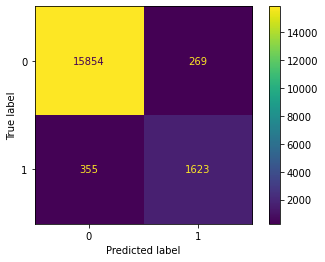

In [31]:
y_pred= (y_pred_probab>0.5)*1
print('Test AUROC',auc)
print('Classification report with Threshold=0.5')
print(classification_report(y_test,y_pred,target_names=['0','1']))
cm = confusion_matrix(y_test,y_pred) #Matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [32]:
#os.chdir('Datos')
#os.chdir('../')
#os.chdir('Modelos')
os.chdir('../Modelos')
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [26]:
fh = open('m_XGBoost_PCA_v5','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model,fh)
fh.close()

### Resultados 6 iteración

In [ ]:
##### versión de varios candidatos, mi equipo solo permite 3 utilizando memoria RAM
params={ 'base_score': [0.5], # prediccion inicial
     #'booster': ['gbtree'],# (gbtree, gblinear, dart) default=gbtree
     'colsample_bylevel': [1],
     'colsample_bytree': [0.8], #aletoreidad en selección de columnas de cada arbol
     'learning_rate': [0.05], # [0.05,0.1,0.01]  muy relacionado con el numero de estimadores, preferible learning rate bajo 0.01 y 1000 estimadores por ejemplo
     'max_depth': [4,6], #[2,3,4] [4,5,6]
     #'max_leaves': [0,5], #[5,10]
     'min_child_weight': [1], # minimo numero samples por hoja
     #'missing': [np.nan], # si queremos reemplazar los missings por un numero
     'n_estimators': [100], # [100,500] 100 es valor default de numero de arboles [100,150,200,250,300,350,400]
     'n_jobs': [-1], # trabajos en paralelo
     #'predictor': ['gpu_predictor'], #default=auto --- Prediction using GPU. Used when tree_method is gpu_hist. only recommended for performing prediction tasks.
     'random_state': [0], # seed para generar los folds
     'reg_alpha': [0.01], # L1 regularitacion
     'reg_lambda': [0.01], # L2 regularitacion
     'scale_pos_weight': [1],
     #'tree_method': ['gpu_hist'], #default=auto ['gpu_hist'] utiliza gpu
     'subsample': [0.9]} # ratio de muestras por cada arbol 

In [9]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,5103.547629,134.571795,26.277997,10.214105,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.959360,0.968947,0.975112,0.967806,0.006481,2
1,5678.290452,51.942058,16.448121,1.128203,0.5,1,0.8,0.05,6,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.972429,0.979735,0.984869,0.979011,0.005104,1


In [10]:
model_result_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, ...)

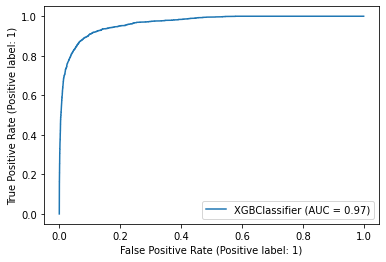

Train AUC 0.9877163150673188
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     31010
           1       0.95      0.84      0.89      9303

    accuracy                           0.95     40313
   macro avg       0.95      0.91      0.93     40313
weighted avg       0.95      0.95      0.95     40313



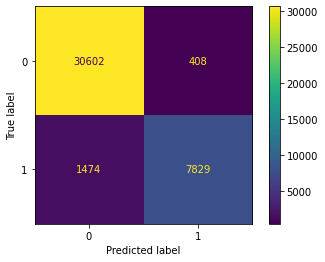

Test AUC 0.9654489594414308
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15260
           1       0.81      0.71      0.76      1784

    accuracy                           0.95     17044
   macro avg       0.89      0.85      0.87     17044
weighted avg       0.95      0.95      0.95     17044



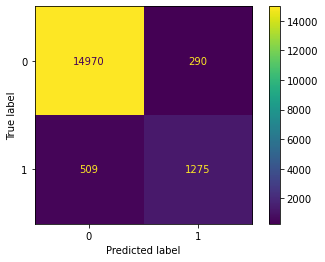

In [11]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [7]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'c:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [13]:
fh = open('m_XGBoost_PCA_v4','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### Resultados 5 iteración

In [30]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,5167.073905,35.639344,24.342004,4.786176,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.960837,0.969944,0.973237,0.968006,0.005245,2
1,16874.396545,1423.178192,18.572857,5.745100,0.5,1,0.8,0.05,4,1,...,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.981924,0.990718,0.993066,0.988569,0.004796,1


In [32]:
model_result_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.01, reg_lambda=0.01, ...)

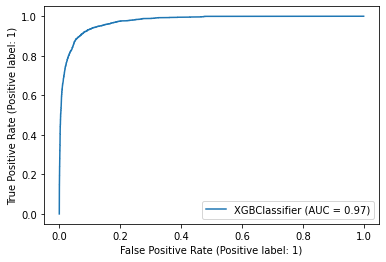

Train AUC 0.9973535789583989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31010
           1       0.97      0.95      0.96      9303

    accuracy                           0.98     40313
   macro avg       0.98      0.97      0.97     40313
weighted avg       0.98      0.98      0.98     40313



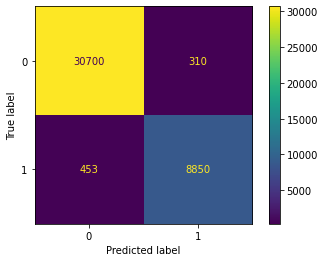

Test AUC 0.9743793123967817
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     15260
           1       0.82      0.74      0.78      1784

    accuracy                           0.96     17044
   macro avg       0.89      0.86      0.88     17044
weighted avg       0.95      0.96      0.95     17044



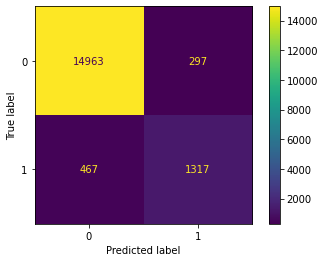

In [31]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

In [33]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [34]:
fh = open('m_XGBoost_PCA_v3','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### Resultados 4ta iteración

In [27]:
model_result_xgboost.best_params_

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_jobs': -1,
 'random_state': 0,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'scale_pos_weight': 1,
 'subsample': 0.9}

In [28]:
model_result_xgboost.cv_results_

{'mean_fit_time': array([2600.61831212, 3223.84113348, 3448.41549671]),
 'std_fit_time': array([328.87866902,  59.42346442,  62.57965052]),
 'mean_score_time': array([101.2131778 ,  38.88206875,  34.0226016 ]),
 'std_score_time': array([29.12381828, 11.23477924,  1.1862638 ]),
 'param_base_score': masked_array(data=[0.5, 0.5, 0.5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bylevel': masked_array(data=[1, 1, 1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.8, 0.8, 0.8],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 3, 4],
              mask=[False, False, False],
        fill_value

In [29]:
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [ ]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

'C:\\Users\\metal\\Trabajos Bootcamp\\Proyecto Final\\juanito_v2.0\\Modelos'

In [30]:
fh = open('m_XGBoost_PCA_v2','wb')
#fh = open('df_smote30_train_test(redux).pkl','wb')
pickle.dump(model_result_xgboost,fh)
fh.close()

### si queremos retomar algun modelo ya entrenado para analizar sus metricas

In [ ]:
#os.chdir(r'C:\Users\metal\Trabajos Bootcamp\Proyecto Final\juanito_v2.0\Modelos')
os.chdir('../')
os.chdir('Modelos')
os.getcwd()

In [6]:
fh1=open('m_XGBoost_PCA_v2.pkl','rb')
train_test=pickle.load(fh1)
fh1.close()

FileNotFoundError: [Errno 2] No such file or directory: 'm_XGBoost_PCA_v2.pkl'

In [31]:
results_cv=model_result_xgboost.cv_results_
results=pd.DataFrame(results_cv)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,...,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_roc_auc,split1_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,2600.618312,328.878669,101.213178,29.123818,0.5,1,0.8,0.05,2,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.937400,0.951163,0.944281,0.006882,3
1,3223.841133,59.423464,38.882069,11.234779,0.5,1,0.8,0.05,3,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.952633,0.964321,0.958477,0.005844,2
2,3448.415497,62.579651,34.022602,1.186264,0.5,1,0.8,0.05,4,1,...,0.01,0.01,1,0.9,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.961567,0.971961,0.966764,0.005197,1


In [ ]:
sns.relplot(x="param_max_depth",
            y="std_test_roc_auc",
            #style="param_max_features",
            #hue="param_min_impurity_decrease",
            kind = "line",
            palette=["r", "b"],
            height=3, linewidth=3, data=results)

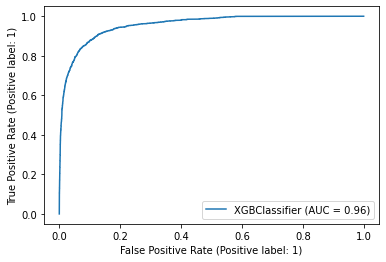

Train AUC 0.972152701813672
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31010
           1       0.92      0.72      0.81      9303

    accuracy                           0.92     40313
   macro avg       0.92      0.85      0.88     40313
weighted avg       0.92      0.92      0.92     40313



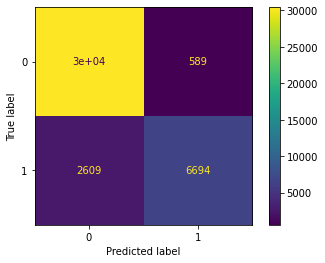

Test AUC 0.9563832471833511
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15260
           1       0.80      0.65      0.72      1784

    accuracy                           0.95     17044
   macro avg       0.88      0.82      0.84     17044
weighted avg       0.94      0.95      0.94     17044



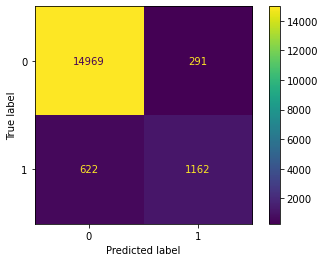

In [32]:
metrics(model_result_xgboost.best_estimator_, X_train_smote, X_test, y_train_smote, y_test, thr=0.5)

### Resultados primera iteración (incorrecto aplicación de smote sobre muetra para test)

In [11]:
#Ahora todos los modelos los usamos con la data train para obtener las probabilidades
y_pred = model_result_xgboost.predict(X_train)
probs = model_result_xgboost.predict_proba(X_train)
print('Train AUC:', roc_auc_score(y_train,probs[:,1]))

#Ahora evaluo el resultado con la data de test
y_pred = model_result_xgboost.predict(X_test)
probs = model_result_xgboost.predict_proba(X_test)
print(" Test AUC:", roc_auc_score(y_test,probs[:,1]))

Train AUC: 0.9630412048830986
 Test AUC: 0.9621369872399149


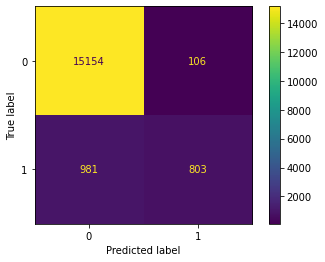

In [9]:
#plot_confusion_matrix(model_result,  X_test, y_test) funcion deprecada en futuras versiones
cm = confusion_matrix(y_test,y_pred)
disp =ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_result_xgboost.classes_)
disp.plot()
plt.show()

In [10]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9534261331244968


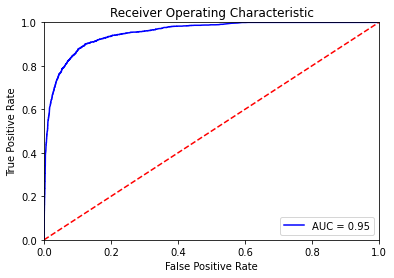

In [11]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
print(classification_report(y_test,y_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15260
           1       0.88      0.45      0.60      1784

    accuracy                           0.94     17044
   macro avg       0.91      0.72      0.78     17044
weighted avg       0.93      0.94      0.93     17044

